##Подключаем нужные импорты

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

##Инициализация параметров:

In [ ]:
M_with_fuel = 553098
M_without_fuel_without_rocket_stage = 45970
M_without_fuel = 130970
time_of_flight = 310
changing_m_per_sec = (M_with_fuel - M_without_fuel) / time_of_flight

pressure_above_sea_level = 101325
painting_mass_of_dry_air = 0.029
g = 9.81
R = 8.31
T0 = 273.15 + 20
exp = math.e
pi = math.pi
impulse = 150
Cf = 0.5
r = 7.8
S = r ** 2 * pi

#Графики

###Масса ракеты в течение полета на первой ступени:

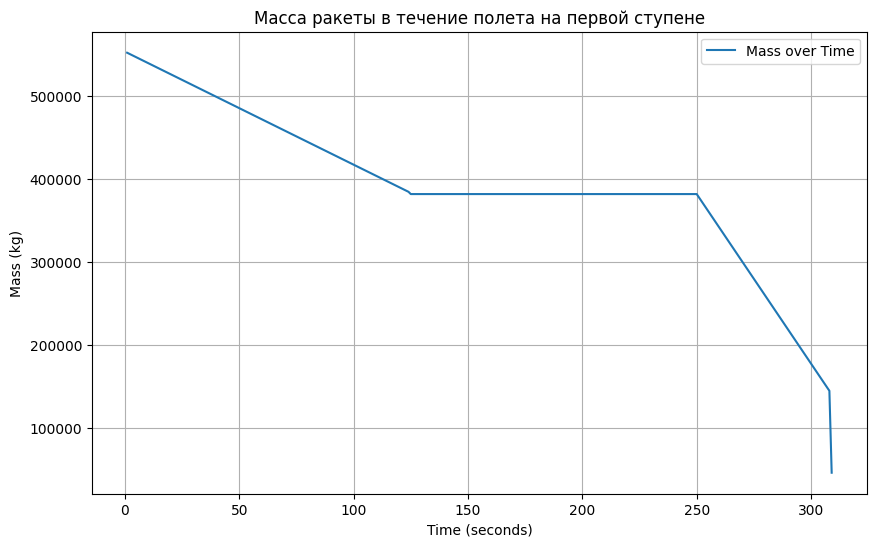

In [ ]:
mass_results = [M_with_fuel - changing_m_per_sec * t for t in range(1, 125)]

for i in range(125, 250):
    mass_results.append(M_with_fuel - changing_m_per_sec * 126)
for i in range(126, 303, 3):
    mass_results.append(M_with_fuel - changing_m_per_sec * i)
mass_results.append(M_without_fuel_without_rocket_stage)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 310), mass_results, label='Mass over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Mass (kg)')
plt.title('Масса ракеты в течение полета на первой ступени')
plt.legend()
plt.grid(True)
plt.show()

###Давление вохдуха до выхода на орбиту

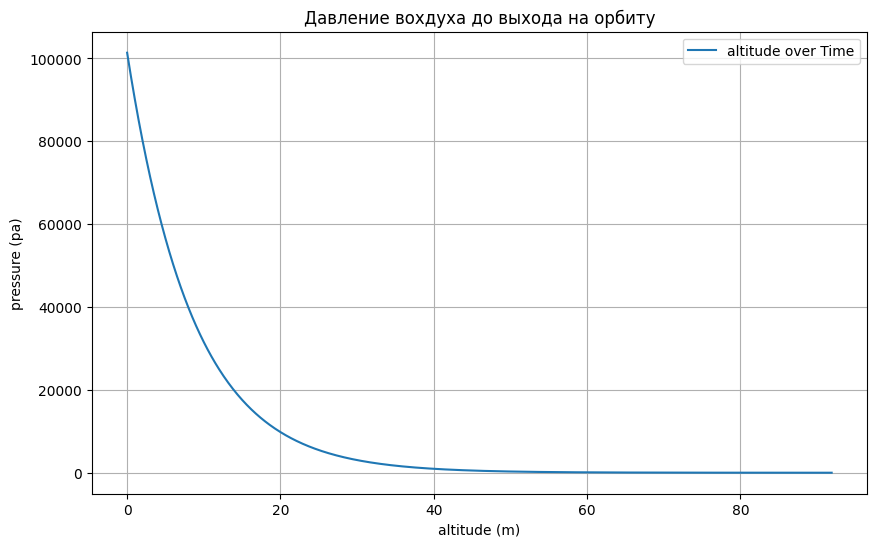

In [ ]:
mas = [i / 10 for i in range(0, 920)]
altitude_results = [
    pressure_above_sea_level * (exp ** ((-painting_mass_of_dry_air * g * h * 1000) / (R * T0)))
    for h in mas]
plt.figure(figsize=(10, 6))
plt.plot(mas, altitude_results, label='altitude over Time')
plt.xlabel('altitude (m)')
plt.ylabel('pressure (pa)')
plt.title('Давление вохдуха до выхода на орбиту')
plt.legend()
plt.grid(True)
plt.show()

###Высота ракеты в течение полета на первой ступени

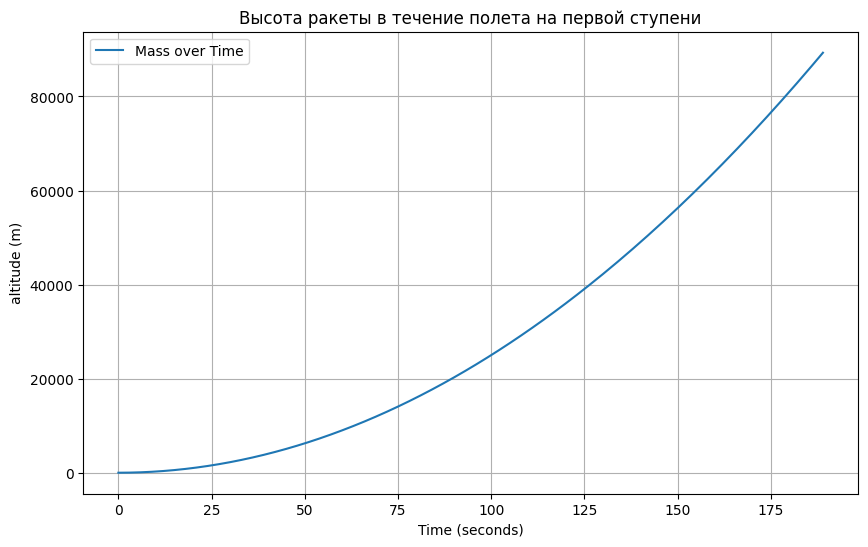

In [ ]:
altitude_results = [2.5 * t ** 2 for t in range(190)]
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(190), altitude_results, label='Mass over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('altitude (m)')
plt.title('Высота ракеты в течение полета на первой ступени')
plt.legend()
plt.grid(True)
plt.show()

###Плотность воздуха до выхода на орбиту

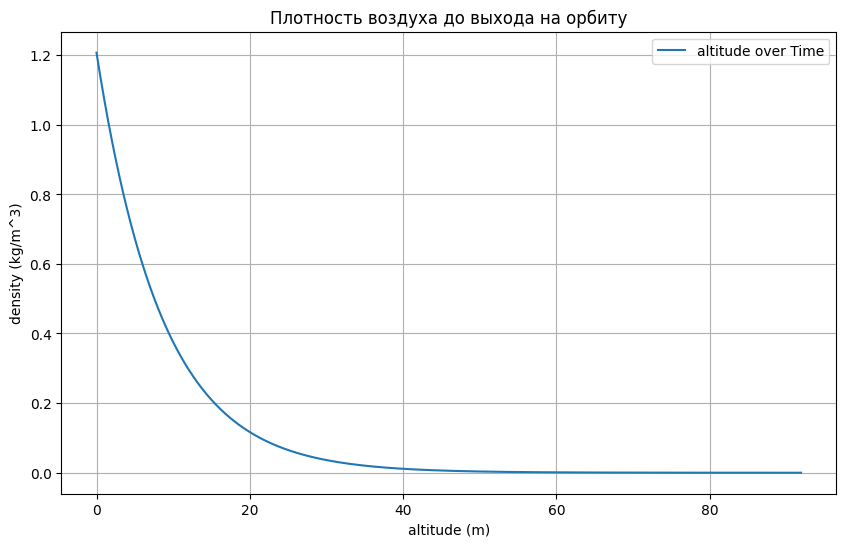

In [ ]:
mas = [i / 10 for i in range(0, 920)]
altitude_results = [
    pressure_above_sea_level * (
                exp ** ((-painting_mass_of_dry_air * g * h * 1000) / (R * T0)) * painting_mass_of_dry_air / (
                    R * T0))
    for h in mas]
plt.figure(figsize=(10, 6))
plt.plot(mas, altitude_results, label='altitude over Time')
plt.xlabel('altitude (m)')
plt.ylabel('density (kg/m^3)')
plt.title('Плотность воздуха до выхода на орбиту')
plt.legend()
plt.grid(True)
plt.show()


###График x и y от времени положения Луны

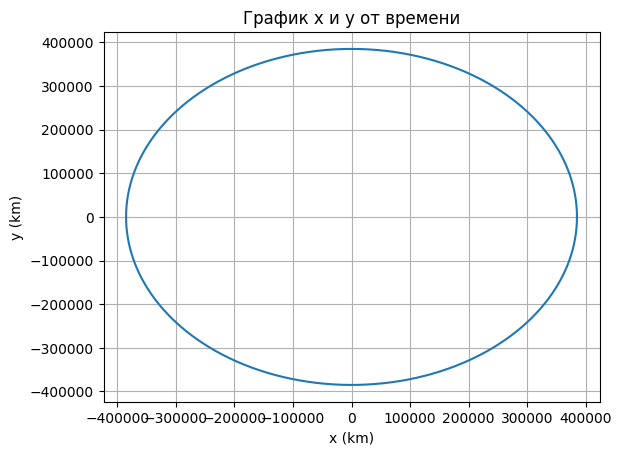

In [ ]:
t = np.linspace(0, 2358720, 1000)
x = 385000 * np.cos((2 * np.pi * t) / 2358720)
y = 385000 * np.sin((2 * np.pi * t) / 2358720)

plt.plot(x, y)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('График x и y от времени')
plt.grid(True)
plt.show()

###График x и y от времени положения Муны

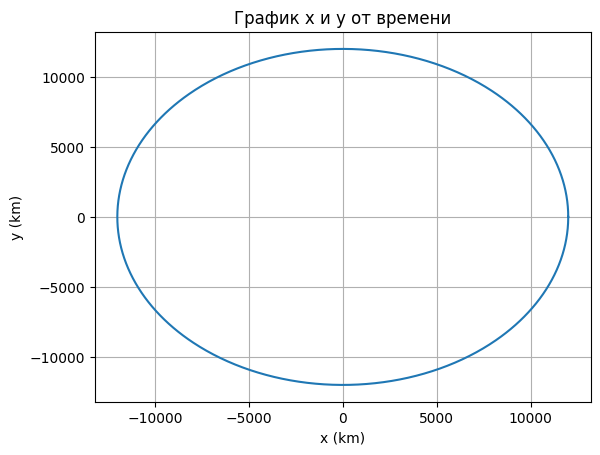

In [ ]:
t = np.linspace(0, 564192, 1000)
x = 12000 * np.cos((2 * np.pi * t) / 564192)
y = 12000 * np.sin((2 * np.pi * t) / 564192)

plt.plot(x, y)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('График x и y отвремени времени')
plt.grid(True)
plt.show()

###Масса в реальном полете

In [1]:
import xlwings as xw

ModuleNotFoundError: ignored

In [ ]:
wb = xw.Book('ksp_data.csv').sheets[0]

In [4]:
mas_time_of_flight = wb.range('A2:A1723').value

mass = wb.range('G2:G1723').value
mas = [int(float(i)) * 1000 for i in mass]
plt.figure(figsize=(10, 6))
plt.plot(mas_time_of_flight, mas, label='altitude over Time')
plt.xlabel('time (s)')
plt.ylabel('mass (kg)')
plt.title('Реальный полет')
plt.legend()
plt.grid(True)
plt.show()



NameError: ignored

###Высота в реальном полете

In [ ]:
mas_time_of_flight = wb.range('A2:A184').value

mass = wb.range('H2:H184').value
mas = [int(float(i)) for i in mass]
plt.figure(figsize=(10, 6))
plt.plot(mas_time_of_flight, mas, label='altitude over Time')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title('График высоты от времени (реальный полет)')
plt.legend()
plt.grid(True)
plt.show()